import libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

read input data

In [43]:
data = pd.read_csv('data/BigMart_Sales.csv')
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [44]:
data.info()           #to check data informaion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
data.isnull().sum()   # single out the null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

the null value would be handled by replace the NUMERICAL COLUMN values reaplaced with MEAN and CATEGORICAL COLUMN replaced with MODE

In [46]:
data['Item_Weight'].mean()

12.857645184135976

In [47]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True) #fill null value with mean

C:\Users\adegb\AppData\Local\Temp\ipykernel_7888\3035278903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True) #fill null value with mean


In [48]:
data.isnull().sum()   # single out the null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [49]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x:x.mode())) # find outlet_size_mode using Outlet_Type ranges

In [50]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


find the missing location in Outlet_Size and filling them with the computed outlet_size_mode

In [51]:
missing_values_loc = data['Outlet_Size'].isnull() #find missing location (which are True locations)

In [52]:
missing_values_loc

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

the syntax below means, where the missing_values_loc is true in Outlet_Type, reaplace the missing_values_loc that match the Outlet_Type in outlet_size_mode

In [53]:
data.loc[missing_values_loc, 'Outlet_Size'] = data.loc[missing_values_loc, 'Outlet_Type'].apply(lambda x:outlet_size_mode[x]) 

In [54]:
data.isnull().sum()   # single out the null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Check data summary

In [55]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


visualise data distribution for Item_Weight

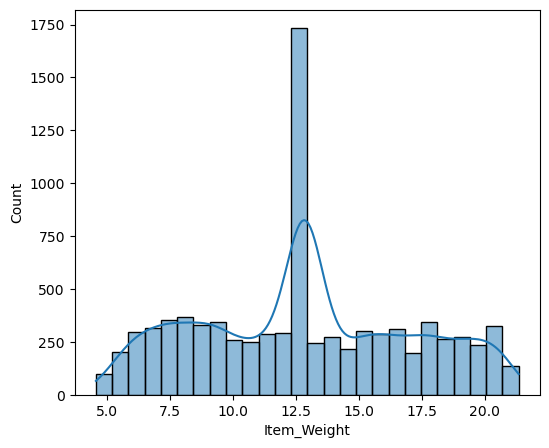

In [56]:
%matplotlib inline
plt.figure(figsize=(6, 5))
sns.histplot(data["Item_Weight"], kde=True)
plt.show()


visualise data distribution for Item_Visibility

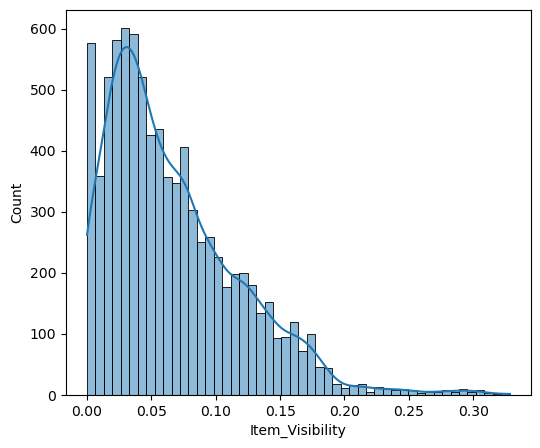

In [57]:
%matplotlib inline
plt.figure(figsize=(6, 5))
sns.histplot(data["Item_Visibility"], kde=True)
plt.show()


visualise data distribution for Item_MRP

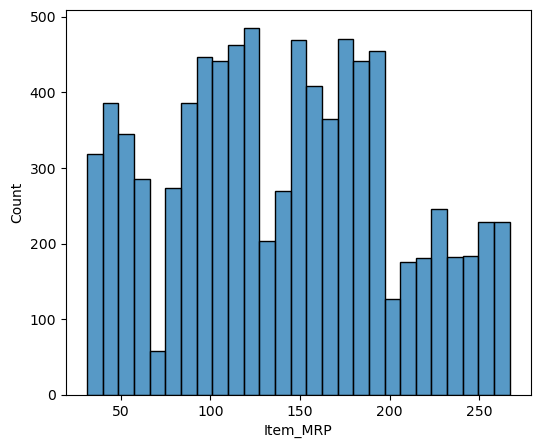

In [58]:
%matplotlib inline
plt.figure(figsize=(6, 5))
sns.histplot(data["Item_MRP"])
plt.show()


visualise data distribution for Item_Outlet_Sales

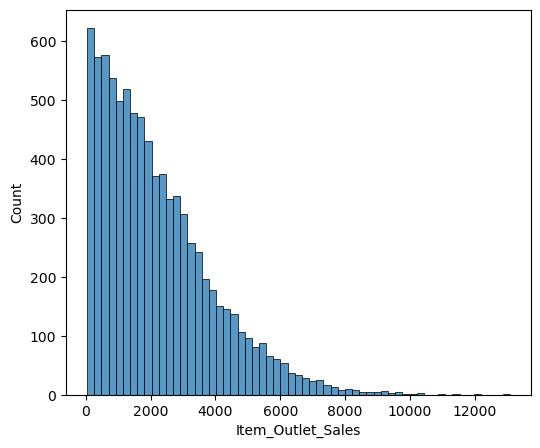

In [59]:
%matplotlib inline
plt.figure(figsize=(6, 5))
sns.histplot(data["Item_Outlet_Sales"])
plt.show()

visualise Outlet_Establishment_Year Plot


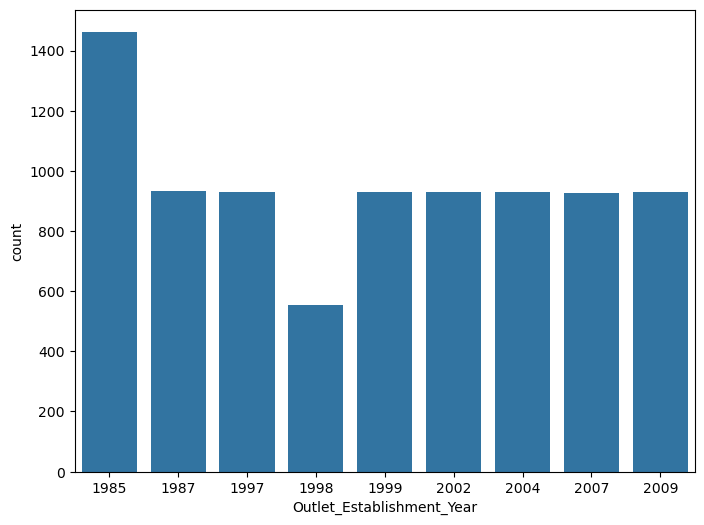

In [60]:
%matplotlib inline
plt.figure(figsize=(8, 6))
sns.countplot(x = data["Outlet_Establishment_Year"], data=data)
plt.show()

Visualise categories data for better understanding

In [61]:
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


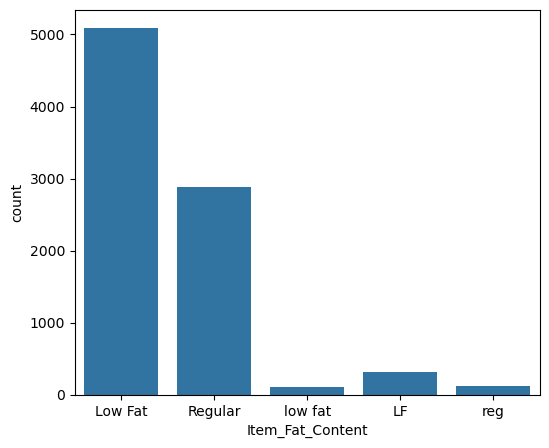

In [62]:
#visualise Item_Fat_Content plot
%matplotlib inline
plt.figure(figsize=(6, 5))
sns.countplot(x = data["Item_Fat_Content"], data=data)
plt.show()

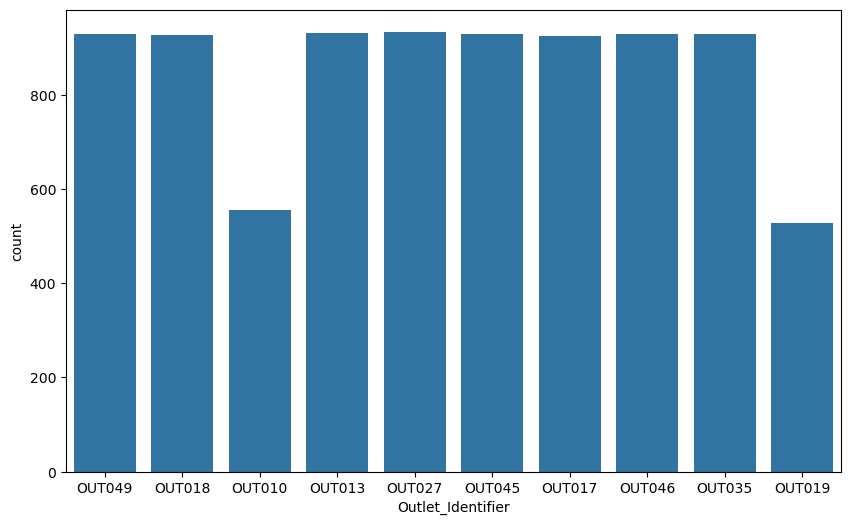

In [63]:
#visualise Outlet_Identifier
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.countplot(x = data["Outlet_Identifier"], data=data)
plt.show()

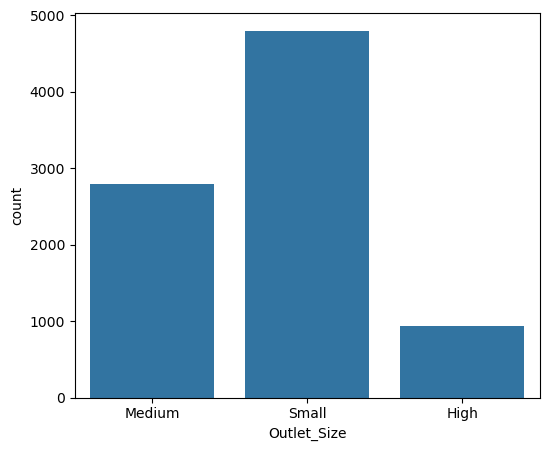

In [64]:
#visualise Outlet_Size
%matplotlib inline
plt.figure(figsize=(6, 5))
sns.countplot(x = data["Outlet_Size"], data=data)
plt.show()

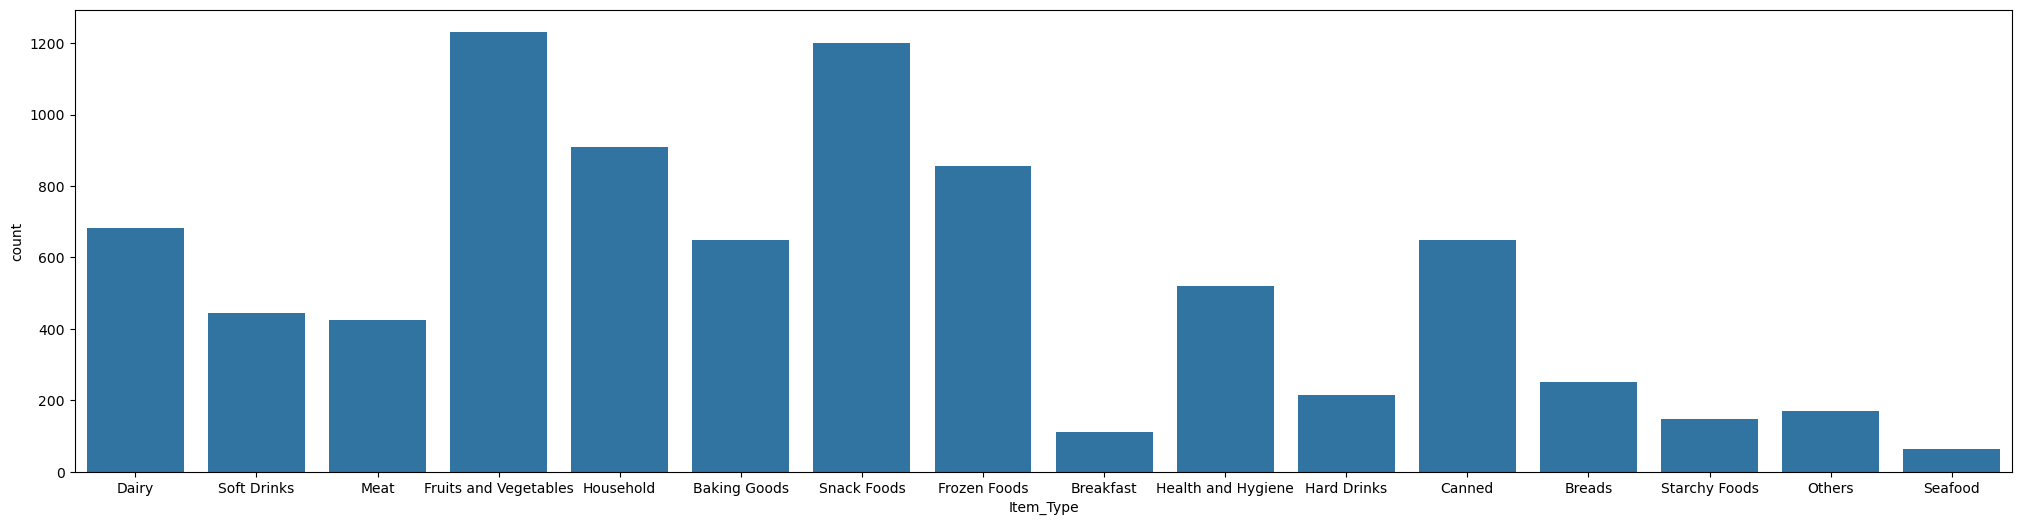

In [65]:
#visualise Item_Type
%matplotlib inline
plt.figure(figsize=(25, 6))
sns.countplot(x = data["Item_Type"], data=data)
plt.show()

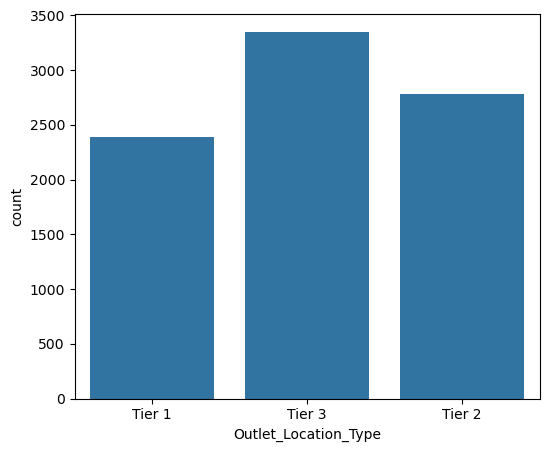

In [66]:
#visualise Outlet_Location_Type
%matplotlib inline
plt.figure(figsize=(6, 5))
sns.countplot(x = data["Outlet_Location_Type"], data=data)
plt.show()

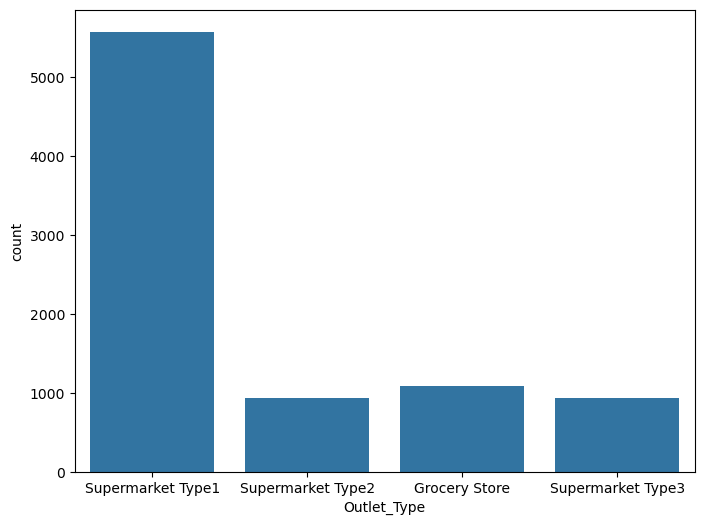

In [67]:
#visualise Outlet_Type
%matplotlib inline
plt.figure(figsize=(8, 6))
sns.countplot(x = data["Outlet_Type"], data=data)
plt.show()

Carryout data cleansing on Item_Fat_Content. i.e merge Low Fat, low fat and LF together

In [68]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [73]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [74]:
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


Convert categories columns to numerical values LabelEncoder

In [75]:
encoder = LabelEncoder()               #create object for LabelEncoder

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [79]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])


In [86]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

divide dataset into input and output data

In [87]:
dataInput = data.drop(columns='Item_Outlet_Sales')
dataOutput = data['Item_Outlet_Sales'] 

Slipting dataset into input and output

In [91]:
x_train, x_test, y_train, y_test = train_test_split(dataInput, dataInput, test_size=0.25)